# Classification (MultiClass) using SVM & Optimal Parameter Selection

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time 
import warnings
from sklearn import svm
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

## 1. Exploring and Preparing Data


In [2]:
data = pd.read_csv('E:/Digit_Recognizer/train.csv')
print("Train Data Shape is: ",data.shape)

Train Data Shape is:  (42000, 785)


In [3]:
label = data.label
data = data.drop('label',axis=1)
print("Data Shape: ",data.shape)
print("Label Shape: ",label.shape)

Data Shape:  (42000, 784)
Label Shape:  (42000,)


In [4]:
data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

Converting 1D array to 2D 28x28 array using **reshape** , to plot and view grayscale images.

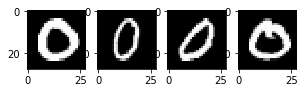

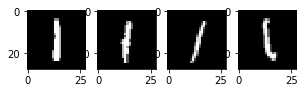

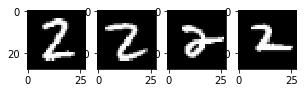

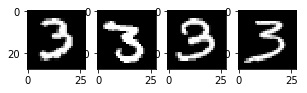

In [5]:
for x in range(0,4):
    train_0=data[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='gray')

### Splitting data into Train and Test Data and Labels
Dividing Data randomly into train and test. Out of total train.csv Data, 80% is kept as train for training the model and 20% is kept as test to score the model.

In [6]:
train, test,train_labels, test_labels = train_test_split(data, label, train_size=0.8, random_state=42)
print("Train Data Shape: ",train.shape)
print("Train Label Shape: ",train_labels.shape)
print("Test Data Shape: ",test.shape)
print("Test Label Shape: ",test_labels.shape)

Train Data Shape:  (33600, 784)
Train Label Shape:  (33600,)
Test Data Shape:  (8400, 784)
Test Label Shape:  (8400,)


## 2. Support Vector Machine (SVM)
Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression problems. It performs classification by finding the hyperplane that maximizes the margin between the two classes.

## 3. Classification using SVM
Using SVM Classifier from **sklearn** library.
We have 33600 training samples, fitting all of them will take a lot of time. To keep it simple for now, lets select 5000 out of them.
You can change the value i to use the desired number of samples.

In [7]:
i=5000;
score=[]
fittime=[]
scoretime=[]
clf = svm.SVC(random_state=42)
print("Default Parameters are: \n",clf.get_params)

Default Parameters are: 
 <bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)>


### Case 1 - Gray Scale Images
Fitting train data and finding a score for test data to check model performance

In [8]:
start_time = time.time()
clf.fit(train[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case1=[score,fittime,scoretime]

Time consumed to fit model:  00:01:34
Accuracy for grayscale:  0.09345238095238095
Time consumed to score:  00:01:11


### Case 2 - Binary Images
To simply the problem, converting images to black and white from gray scale by replacing all values > 0 to 1. 
And Converting 1D array to 2D 28x28 array using **reshape** , to plot and view **binary** images.

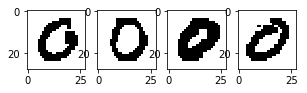

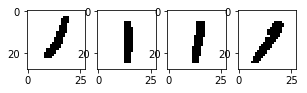

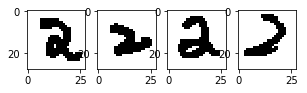

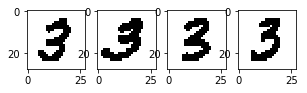

In [9]:
test_b=test
train_b=train
test_b[test_b>0]=1
train_b[train_b>0]=1
for x in range(0,4):
    train_0=train_b[train_labels==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='binary')

In [10]:
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
fititme = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
score=clf.score(test_b,test_labels)
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
print("Accuracy for binary: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case2=[score,fittime,scoretime]

Time consumed to fit model:  00:01:34
Accuracy for binary:  0.9111904761904762
Time consumed to score:  00:00:20


It can be seen that for the chosen training samples, accuracy of Case 2 (91%) is much higher than Case 1 (9.3%).

However, the high dimensionality of data is making computational time high. Lets reduce the dimensions using PCA (Principal Component Analysis)

### Case 3 - GrayScale + Dimensionality Reduction - PCA 
It is a linear transformation technique used to identify strong patterns in data by finding out variable correlation. It maps the data to a lower dimensional subspace in a way that data variance is maximized while retaining most of the information.

Here, Data is standardized and PCA is performed on data with all the components. Then variance is plotted for all components to decide which components to remove.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train)
X_std_train = sc.transform(train)
X_std_test = sc.transform(test)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
train_pca = sklearn_pca.transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

In [12]:
#Keeping 90% of information by choosing components falling within 0.90 cumulative.
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)

Keeping 90% Info with  288  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 288)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 288)


In [13]:
#Lets find the score using reduced dimensions keeping the same amount of samples, to compare accuracy.
start_time = time.time()
clf.fit(train_pca[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case3=[score,fittime,scoretime]

Time consumed to fit model:  00:00:11
Accuracy for grayscale:  0.9188095238095239
Time consumed to score model:  00:00:14


It can be seen that for the chosen training samples, accuracy of Case 3 with PCA is (92%) which was previous Case 1 (9.3%).

### Case 4 - Binary + Dimensionality Reduction - PCA 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train_b)
X_std_train = sc.transform(train_b)
X_std_test = sc.transform(test_b)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
#train_pca_b = sklearn_pca.transform(X_std_train)
#test_pca_b = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()


In [15]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca_b = sklearn_pca.fit_transform(X_std_train)
test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca_b.shape)

Keeping 90% Info with  288  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 288)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 288)


In [16]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca_b,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case4=[score,fittime,scoretime]

Time consumed to fit model:  00:00:11
Accuracy for grayscale:  0.9195238095238095
Time consumed to score model:  00:00:15


### Comparison of 4 Cases

In [17]:
head =["Accuracy","FittingTime","ScoringTime"]
print("\t\t case1 \t\t\t case2 \t\t\t case3 \t\t\t case4")
for h, c1, c2, c3, c4 in zip(head, case1, case2, case3, case4):
    print("{}\t{}\t{}\t{}\t{}".format(h, c1, c2, c3, c4))

		 case1 			 case2 			 case3 			 case4
Accuracy	0.09345238095238095	0.9111904761904762	0.9188095238095239	0.9195238095238095
FittingTime	94.31749510765076	94.31749510765076	11.182443857192993	11.121026277542114
ScoringTime	71.42854809761047	20.001235246658325	14.984630346298218	15.137639284133911


**Observations:**

+ By simplifying the problem in Case 2 (by converting images to binary), accuracy increases from 9%~ to 91%~ for the chosen number of samples.
+ By reducing dimensions in Case3 and Case4, fitting time reduces drastically.

## 4. Training Data Size Vs Accuracy , Fitting & Score Times
Understanding how training data size affects accuracy.

In [18]:
from tqdm import tqdm

fit_time=[]
score=[]
score_time=[]
for j in tqdm(range(1000,31000,5000)):
    start_time = time.time()
    clf.fit(train_pca_b[:j], train_labels[:j].values.ravel())
    fit_time.append(time.time() - start_time)
    start_time = time.time()
    score.append(clf.score(test_pca_b,test_labels))
    score_time.append(time.time() - start_time)

100%|███████████████████████████████████████████| 6/6 [11:10<00:00, 142.40s/it]


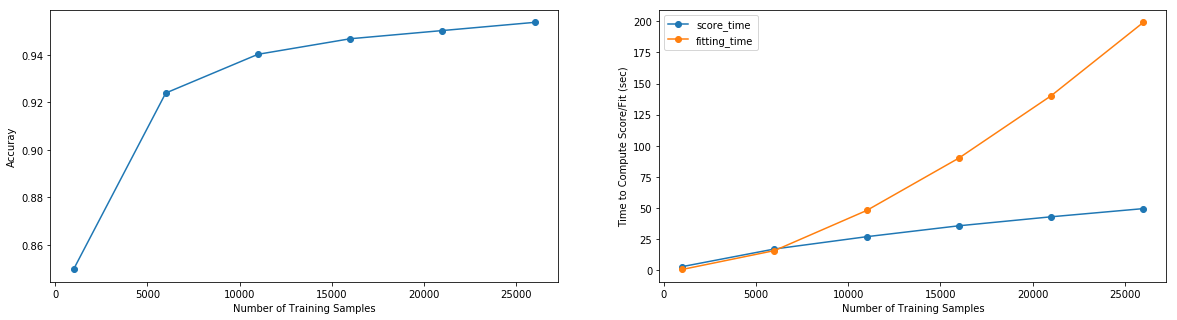

In [19]:
x=list(range(1000,31000,5000))
plt.figure(figsize=[20,5]);
ax1=plt.subplot(1, 2,1)
ax1.plot(x,score,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuray')
ax2=plt.subplot(1, 2,2)
ax2.plot(x,score_time,'-o');
ax2.plot(x,fit_time,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Time to Compute Score/Fit (sec)')
plt.legend(['score_time','fitting_time'])

## 5. Parameter Selection for SVM using GridSearchCV
Out of parameters below, we will be playing with **Gamma** and **C**, where

**Gamma** is the parameter of a Gaussian Kernel (to handle non-linear classification)

**C** is the parameter for the soft margin cost function, also known as cost of misclassification. 

A large **C** gives you low bias and high variance and vice versa.

In [20]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)>

To find optimal combination of parameters to achieve maximum accuracy ,using **GridSearchCV** from sklearn library. GridSearchCV does exhaustive search over specified parameter values for an estimator. 

Storing values of parameters to be passed to GridSearchCV in **parameters**, keeping cross-validation folds as 3 and passing SVM as estimator.

In [21]:
parameters = {'gamma': [1, 0.1, 0.01, 0.001],
             'C': [1000, 100, 10, 1]} 

p = GridSearchCV(clf , param_grid=parameters, cv=3)

In [22]:
#For Case 4 (Binary Images and PCA Reduction):
X=train_pca_b[:i]
y=train_labels[:i].values.ravel()
start_time = time.time()
p.fit(X,y)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time consumed to fit model:  00:15:22


In [23]:
print("Scores for all Parameter Combination: \n",p.cv_results_['mean_test_score'])
print("\nOptimal C and Gamma Combination: ",p.best_params_)
print("\nMaximum Accuracy acheieved on LeftOut Data: ",p.best_score_)

Scores for all Parameter Combination: 
 [0.1132 0.1818 0.7806 0.928  0.1132 0.1818 0.7806 0.928  0.1132 0.1818
 0.7806 0.9306 0.1126 0.176  0.7622 0.919 ]

Optimal C and Gamma Combination:  {'C': 10, 'gamma': 0.001}

Maximum Accuracy acheieved on LeftOut Data:  0.9306


In [24]:
#To verify, lets pass the optimal parameters to Classifier and check the score.
C=p.best_params_['C']
gamma=p.best_params_['gamma']
clf=svm.SVC(C=C,gamma=gamma, random_state=42)

In [25]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))

Time consumed to fit model:  00:00:05
Accuracy for binary:  0.9365476190476191


It can be seen that for the chosen training samples, accuracy of Case 2 has increased from (91%~) to (93.7%) for the optimal parameters.
Now using all training samples:

In [26]:
start_time = time.time()
clf.fit(train_pca_b, train_labels.values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))

Time consumed to fit model:  00:02:09
Accuracy for binary:  0.9688095238095238
